In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
with open('author_data.json') as f:
    coauthor_data = json.load(f)

In [3]:
# Normalize the data
authors = {}
for author_id, data in coauthor_data.items():
    authors[author_id] = {
        "name": f"{data['first name']} {data['last name']}",
        "affiliations": data['affiliations'],
        "topics": [topic['name'] for topic in data['publication topics']],
        "coAuthors": [coauthor['id'] for coauthor in data['coAuthors']],
        "article_count": data['article count']
    }

1. Histogram for the publication topics

In [7]:
# Extract publication topics
topics = []
for author_id, data in authors.items():
    topics.extend(data['topics'])
print(len(topics))

# Count the occurrences of each topic
topic_counts = Counter(topics)

# Get the top twenty most occurred topics
top_topics = topic_counts.most_common(20)
topics, counts = zip(*top_topics)

22439


In [6]:
print(topic_counts)

20
Counter({'Network protocols': 935, 'Network architectures': 691, 'Performance': 626, 'Mobile networks': 618, 'Network management': 557, 'Distributed systems organizing principles': 536, 'Networks': 456, 'Wireless access networks': 444, 'Communication hardware, interfaces and storage': 427, 'Network monitoring': 413, 'Routing protocols': 381, 'Distributed architectures': 368, 'Dependable and fault-tolerant systems and networks': 354, 'Network services': 341, 'Network measurement': 247, 'Transport protocols': 234, 'Security and privacy': 216, 'Public Internet': 202, 'Cloud computing': 200, 'Machine learning': 197, 'Programmable networks': 192, 'Network security': 192, 'Network structure': 192, 'Organizing principles for web applications': 190, 'Packet-switching networks': 186, 'Network performance evaluation': 183, 'Data center networks': 160, 'Operating systems': 159, 'Measurement': 158, 'Neural networks': 152, 'Metrics': 129, 'Network protocol design': 128, 'Reliability': 127, 'Appl

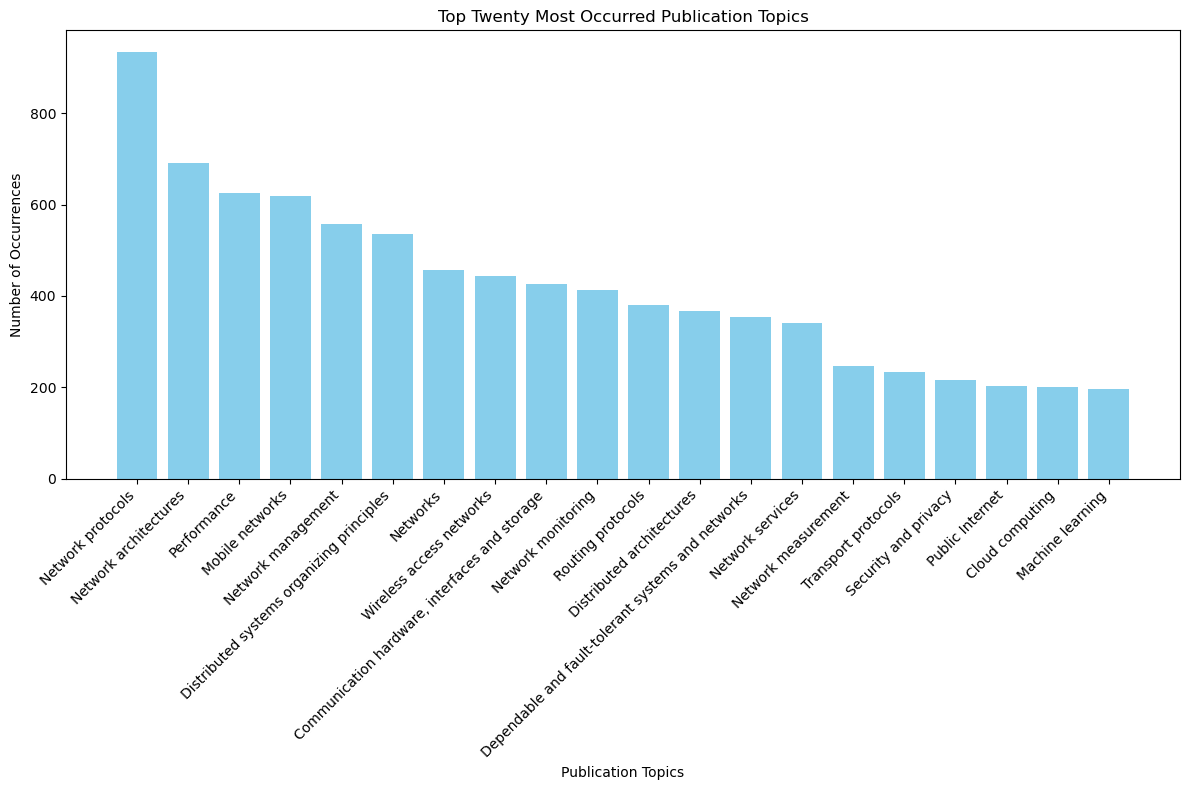

In [6]:
# Plot the histogram
plt.figure(figsize=(12, 8))
plt.bar(topics, counts, color='skyblue')
plt.xlabel('Publication Topics')
plt.ylabel('Number of Occurrences')
plt.title('Top Twenty Most Occurred Publication Topics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. Histogram for the affiliations

In [7]:
# Extract affiliations
affiliations = []
for author_id, data in authors.items():
    affiliations.extend(data['affiliations'])

# Count the occurrences of each affiliation
affiliation_counts = Counter(affiliations)

# Get the top twenty most occurred affiliations
top_affiliations = affiliation_counts.most_common(20)
affiliations, counts = zip(*top_affiliations)

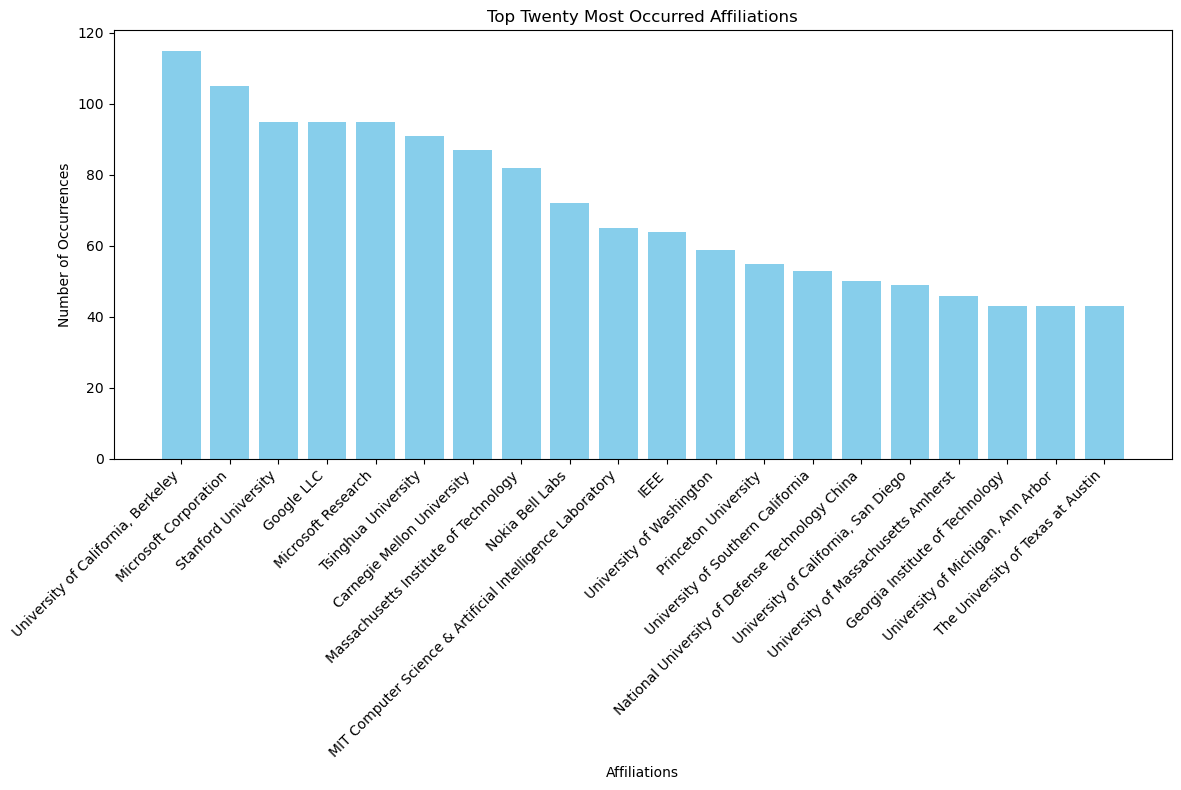

In [8]:
# Plot the histogram
plt.figure(figsize=(12, 8))
plt.bar(affiliations, counts, color='skyblue')
plt.xlabel('Affiliations')
plt.ylabel('Number of Occurrences')
plt.title('Top Twenty Most Occurred Affiliations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3. Bar graph to illustrate author productivity

In [9]:
# Extract author names and article counts
author_productivity = {data['name']: data['article_count'] for data in authors.values()}

# Sort authors by the number of publications
sorted_authors = sorted(author_productivity.items(), key=lambda x: x[1], reverse=True)

# Get the top productive authors
top_n = 20
top_authors = sorted_authors[:top_n]
author_names, article_counts = zip(*top_authors)

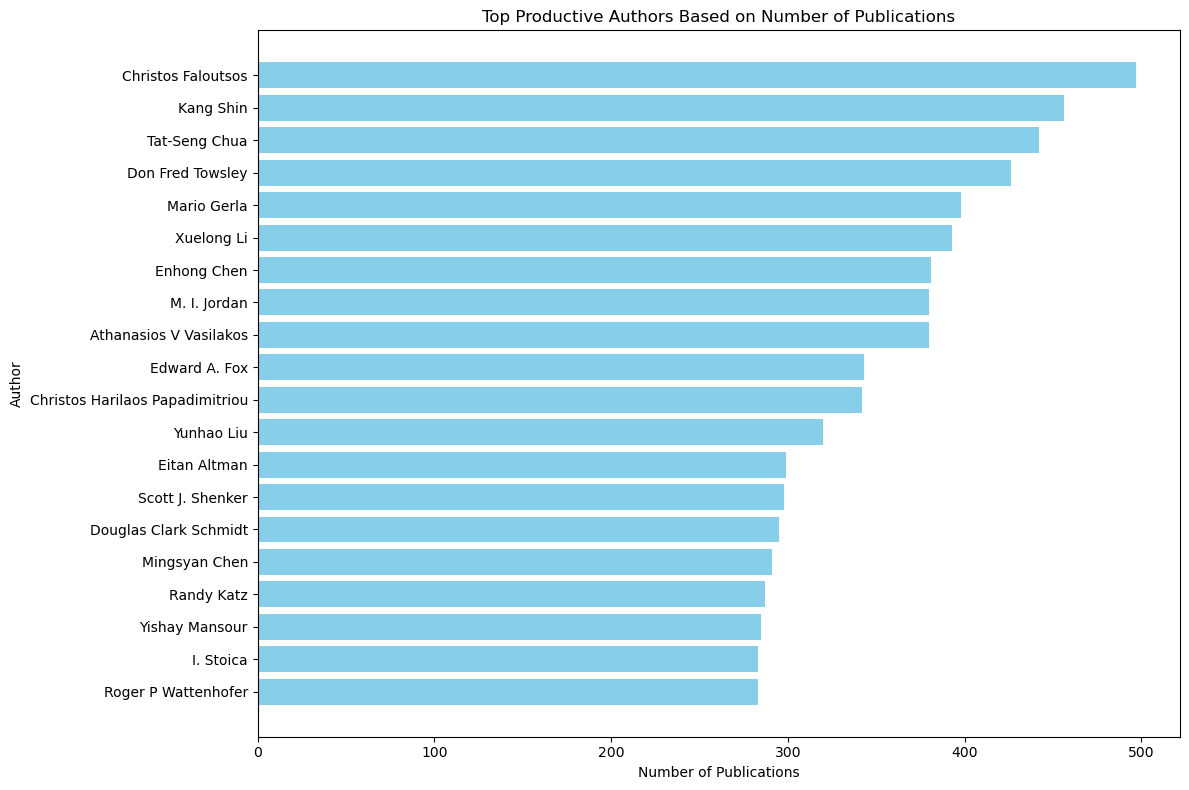

In [10]:
plt.figure(figsize=(12, 8))
plt.barh(author_names, article_counts, color='skyblue')
plt.xlabel('Number of Publications')
plt.ylabel('Author')
plt.title('Top Productive Authors Based on Number of Publications')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [11]:
# Coauthorship Graph
G = nx.Graph()
for author_id, data in authors.items():
    G.add_node(author_id, name=data['name'])
    for coauthor_id in data['coAuthors']:
        G.add_edge(author_id, coauthor_id)

In [12]:
# Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print(f"Clustering Coefficient: {clustering_coefficient:.4f}")

Clustering Coefficient: 0.6116


Degree Distribution: [168, 152, 135, 111, 109, 96, 93, 92, 88, 87, 83, 82, 80, 79, 78, 72, 69, 68, 66, 66, 66, 63, 62, 62, 62, 60, 59, 58, 58, 56, 55, 54, 53, 53, 52, 52, 52, 50, 50, 49, 48, 48, 47, 47, 47, 47, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 43, 43, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 40, 40, 39, 39, 39, 39, 39, 39, 39, 38, 38, 37, 37, 37, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 2

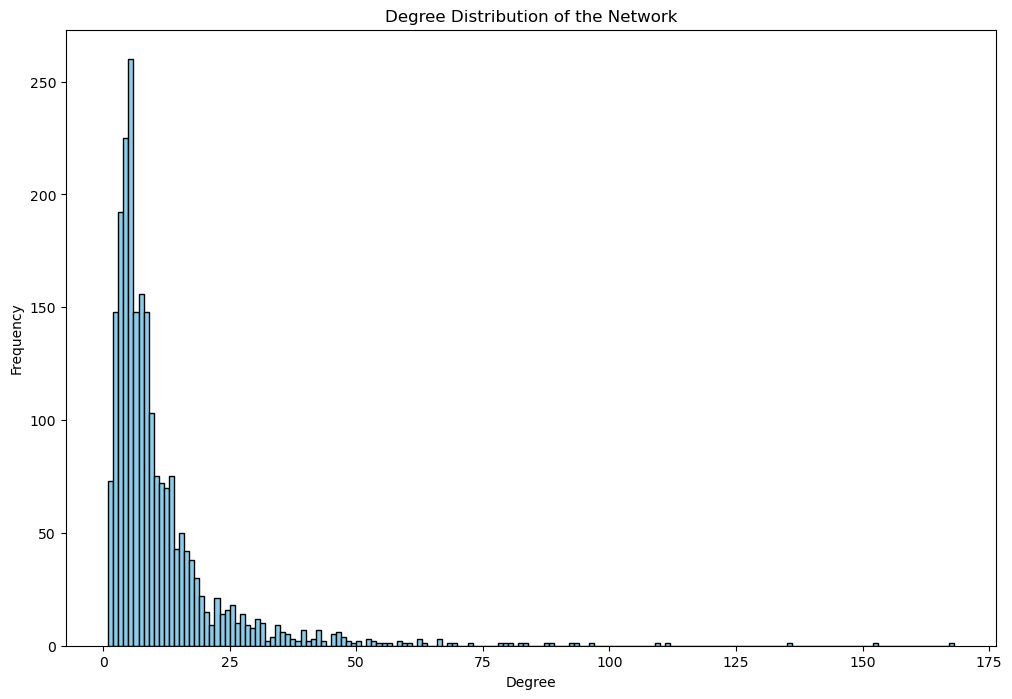

In [13]:
# Calculate degree distribution (the number of edges each node has)
degree_distribution = sorted([d for n, d in G.degree()], reverse=True)
print(f"Degree Distribution: {degree_distribution}")

plt.figure(figsize=(12, 8))
plt.hist(degree_distribution, bins=range(1, max(degree_distribution) + 1), color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Network')
plt.show()

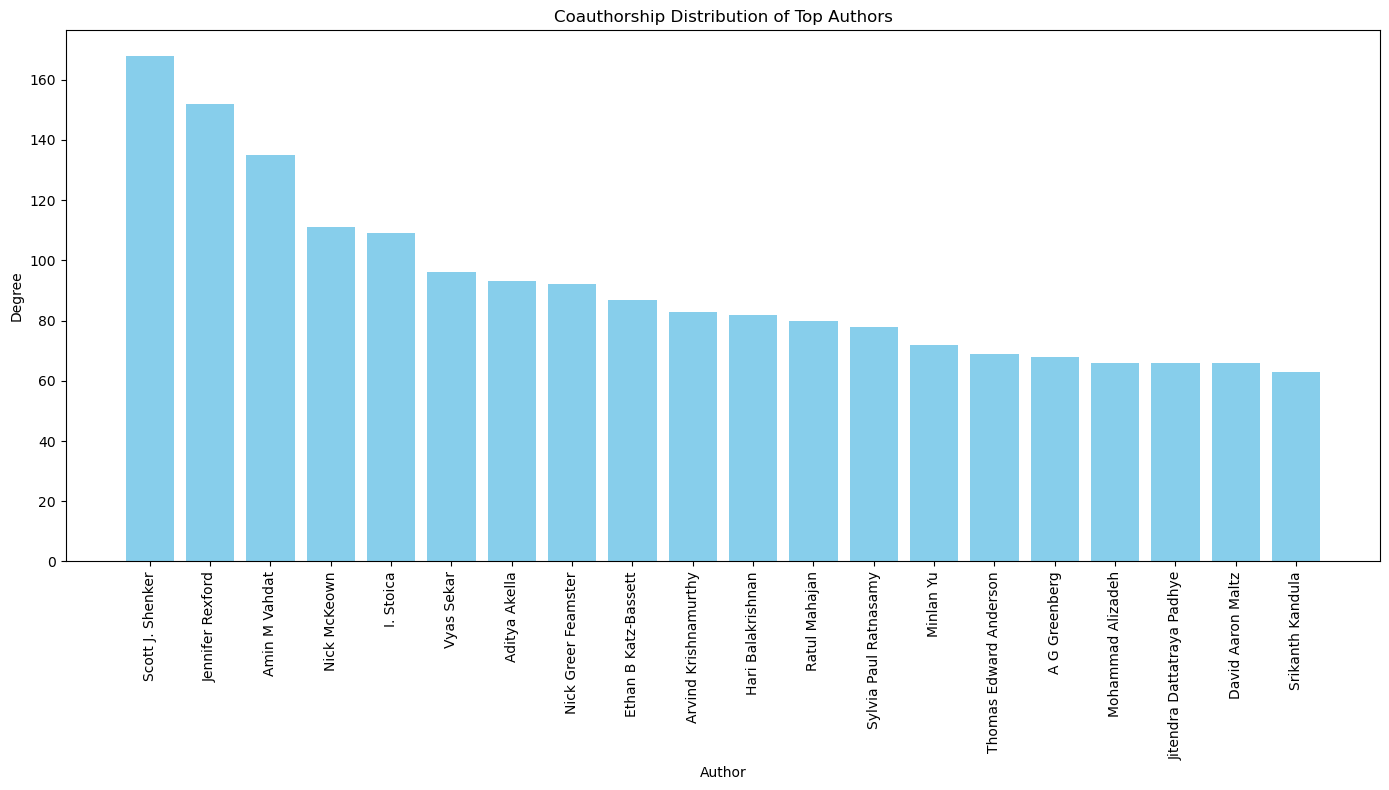

In [14]:
# Top twenty authors who has the most collaboration with others
author_degrees = {data['name']: G.degree(author_id) for author_id, data in authors.items()}
sorted_author_degrees = sorted(author_degrees.items(), key=lambda x: x[1], reverse=True)
top_n = 20
top_authors = sorted_author_degrees[:top_n]
author_names, degrees = zip(*top_authors)

plt.figure(figsize=(14, 8))
plt.bar(author_names, degrees, color='skyblue')
plt.xlabel('Author')
plt.ylabel('Degree')
plt.title('Coauthorship Distribution of Top Authors')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Detect communities
communities = list(nx.algorithms.community.greedy_modularity_communities(G))
print(f"Number of Communities: {len(communities)}")

for i, community in enumerate(communities):
    print(f"Community {i+1}: {len(community)} members")

Number of Communities: 98
Community 1: 548 members
Community 2: 509 members
Community 3: 405 members
Community 4: 116 members
Community 5: 97 members
Community 6: 81 members
Community 7: 32 members
Community 8: 31 members
Community 9: 27 members
Community 10: 27 members
Community 11: 18 members
Community 12: 16 members
Community 13: 14 members
Community 14: 14 members
Community 15: 13 members
Community 16: 11 members
Community 17: 11 members
Community 18: 9 members
Community 19: 9 members
Community 20: 8 members
Community 21: 8 members
Community 22: 8 members
Community 23: 8 members
Community 24: 8 members
Community 25: 7 members
Community 26: 7 members
Community 27: 7 members
Community 28: 6 members
Community 29: 6 members
Community 30: 6 members
Community 31: 6 members
Community 32: 6 members
Community 33: 6 members
Community 34: 6 members
Community 35: 5 members
Community 36: 5 members
Community 37: 5 members
Community 38: 5 members
Community 39: 5 members
Community 40: 5 members
Co